# SHapley Additive exPlanations (SHAP)

## 0. Set-up

In [1]:
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import shap
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
Y = iris.target
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

We select the dataset that we are going to use for training, testing and explanation analysis. In this case, we will use the Iris dataset, often used to classfy instances of setosa, versicolor or virginica flowers based on their petal/sepal width/legth. Therefore the goal is to create a ML model that outputs the class based on these four features.

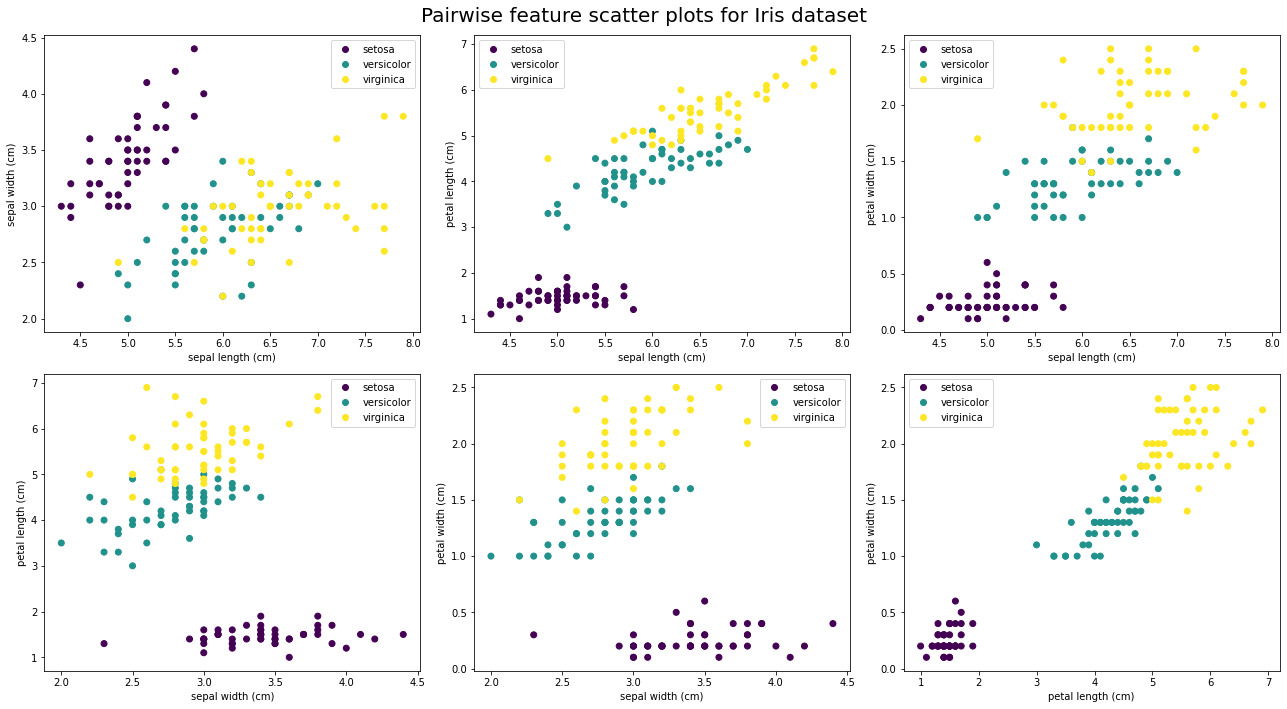

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(18,10))


# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(Y.min(), Y.max())
count, row, col = 0, 0, 0
for x_index in range(0,4):
    for y_index in range(x_index+1, 4):
        ax[row][col].scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
        handles = [plt.Line2D([0, 0], [0, 0], color=cmap(norm(i)), marker='o', linestyle='', label=label)
           for i, label in enumerate(iris.target_names)]
        ax[row][col].set_xlabel(iris.feature_names[x_index])
        ax[row][col].set_ylabel(iris.feature_names[y_index])
        ax[row][col].legend(handles=handles)
        count = count + 1
        row = 0 if count < 3 else 1
        col = count % 3
        

plt.suptitle("Pairwise feature scatter plots for Iris dataset", fontsize=20)
plt.tight_layout()
plt.show()



In [4]:
def print_accuracy(f):
    print("Accuracy = {0}%".format(100*np.sum(f(X_test) == Y_test)/len(Y_test)))

## 1. Model agnostic

First, we focus on model agnostic SHAP models.

In [5]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

print_accuracy(knn.predict)

Accuracy = 96.66666666666667%


In [6]:
explainer = shap.KernelExplainer(knn.predict_proba, X_train)
i = np.random.randint(0, len(X_test))
shap_values = explainer.shap_values(X_test.iloc[i,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[i,:])

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [7]:
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

  0%|          | 0/30 [00:00<?, ?it/s]

## 2. Model-specific

In [8]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

First, we observe the shap values for a single data point

.values =
array([-4.2850167e-01, -6.6636719e-02,  7.7860229e-02, -1.5295845e-03,
       -7.2922713e-01, -2.1700280e+00,  1.9213372e-01, -4.1425934e-01,
       -4.9156108e-01, -4.7296646e-01,  2.5669456e-01, -5.3907130e-02,
        5.7883248e+00], dtype=float32)

.base_values =
22.532942

.data =
array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])


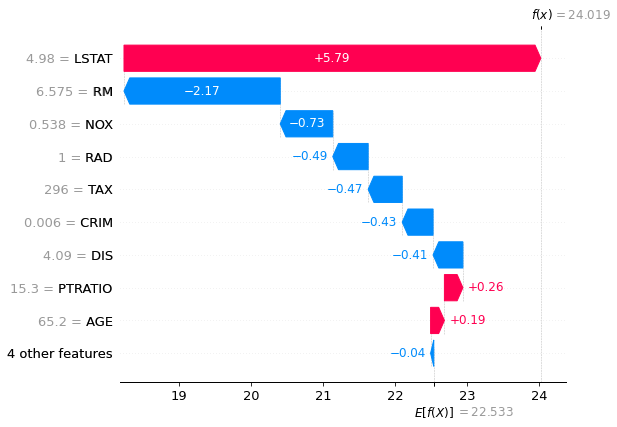

In [9]:
print(shap_values[0])
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [10]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

We can stack all the shap values (the previous plot) and rotate then 90º to obtain a visualization for the whole dataset

In [11]:
# visualize all the training set predictions
shap.plots.force(shap_values)

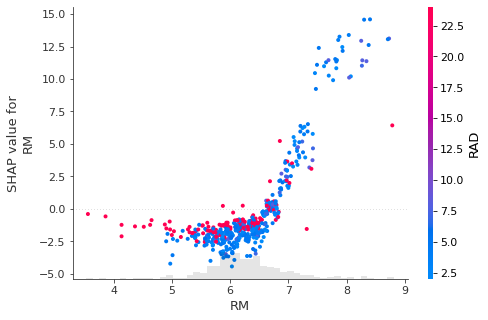

In [12]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)


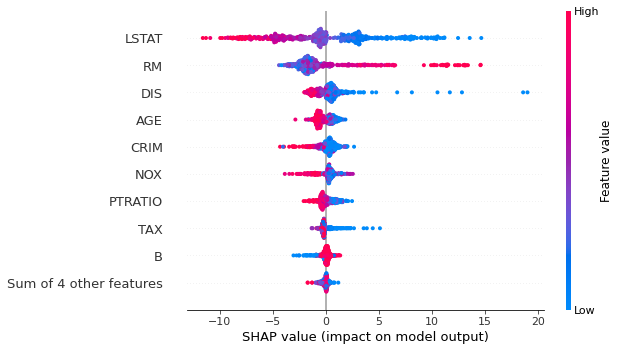

In [13]:
shap.plots.beeswarm(shap_values)

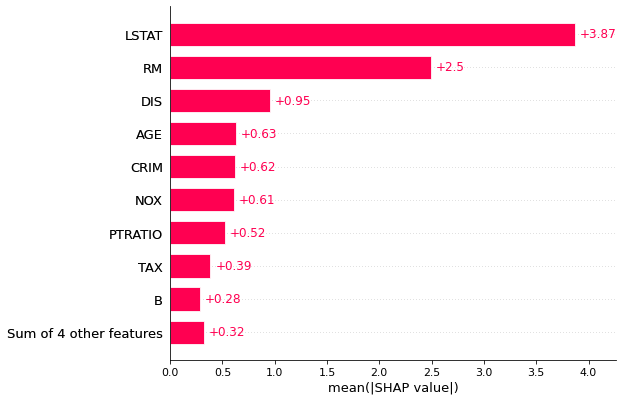

In [14]:
shap.plots.bar(shap_values)